In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('Basel2022WeatherCondition.csv')

In [3]:
df.head()

,location,Basel
0,lat,47.75000
1,lon,7.50000
2,asl,363.653
3,variable,Temperature
4,unit,°C


In [4]:
df.tail()

,location,Basel
8740,20221230T1900,11.250245
8741,20221230T2000,12.240245
8742,20221230T2100,12.770246
8743,20221230T2200,13.220245
8744,20221230T2300,13.430245


In [5]:
df.head(10)

,location,Basel
0,lat,47.75000
1,lon,7.50000
2,asl,363.653
3,variable,Temperature
4,unit,°C
5,level,2 m elevation corrected
6,resolution,hourly
7,aggregation,NaN
8,timestamp,Basel Temperature [2 m elevation corrected]
9,20220101T0000,6.270245


In [6]:
df_info=df.head(9).T
df_info

,0,1,2,3,4,5,6,7,8
location,lat,lon,asl,variable,unit,level,resolution,aggregation,timestamp
Basel,47.75000,7.50000,363.653,Temperature,°C,2 m elevation corrected,hourly,NaN,Basel Temperature [2 m elevation corrected]


In [7]:
df_info=df_info.set_axis(['lat', 'lon', 'asl', 'variable', 'unit', 'level', 'resolution', 'aggregation', 'timestamp'], axis=1)
df_info.drop('location',axis=0,inplace=True)

In [8]:
df_info.drop('aggregation',inplace=True,axis=1)

In [9]:
df_info

,lat,lon,asl,variable,unit,level,resolution,timestamp
Basel,47.75000,7.50000,363.653,Temperature,°C,2 m elevation corrected,hourly,Basel Temperature [2 m elevation corrected]


In [10]:
df=df.iloc[9:].reset_index(drop=True)

In [11]:
df.rename(columns={'location':'Date','Basel':'Temperature'},inplace=True)

In [12]:
df

,Date,Temperature
0,20220101T0000,6.270245
1,20220101T0100,6.4902453
2,20220101T0200,6.0602455
3,20220101T0300,5.5602455
4,20220101T0400,4.630245
...,...,...
8731,20221230T1900,11.250245
8732,20221230T2000,12.240245
8733,20221230T2100,12.770246
8734,20221230T2200,13.220245


In [13]:
df[['DateTime', 'Hour']] = df['Date'].str.split('T', expand=True)
df['Hour']=df['Hour'].str.slice(stop=2)


In [14]:
df['Month'] = pd.to_datetime(df['DateTime']).dt.month_name()
df['Day']  = pd.to_datetime(df['DateTime']).dt.day
df['Year'] = pd.to_datetime(df['DateTime']).dt.year


In [15]:
df.head()

,Date,Temperature,DateTime,Hour,Month,Day,Year
0,20220101T0000,6.270245,20220101,00,January,1,2022
1,20220101T0100,6.4902453,20220101,01,January,1,2022
2,20220101T0200,6.0602455,20220101,02,January,1,2022
3,20220101T0300,5.5602455,20220101,03,January,1,2022
4,20220101T0400,4.630245,20220101,04,January,1,2022


In [16]:
df.drop(['DateTime','Date'],axis=1,inplace=True)


In [17]:
df

,Temperature,Hour,Month,Day,Year
0,6.270245,00,January,1,2022
1,6.4902453,01,January,1,2022
2,6.0602455,02,January,1,2022
3,5.5602455,03,January,1,2022
4,4.630245,04,January,1,2022
...,...,...,...,...,...
8731,11.250245,19,December,30,2022
8732,12.240245,20,December,30,2022
8733,12.770246,21,December,30,2022
8734,13.220245,22,December,30,2022


### Where is Basel?

In [18]:
import folium

In [19]:
lat=df_info['lat'].values.astype(float)
lon=df_info['lon'].values.astype(float)

In [108]:
map=folium.Map(location=[lat,lon],zoom_start=6)

icon_url = 'https://example.com/icon.png'
icon = folium.Icon(icon_url)

featureGroup=folium.FeatureGroup()
folium.Marker(
                location=[47.75000,7.50000],
                popup='Basel',
                icon=icon
).add_to(featureGroup)

featureGroup.add_to(map)

C:\Users\Atlas\AppData\Local\Temp\ipykernel_17368\1785889423.py:5: UserWarning: color argument of Icon should be one of: {'blue', 'lightred', 'pink', 'orange', 'beige', 'lightblue', 'white', 'lightgray', 'lightgreen', 'cadetblue', 'darkblue', 'red', 'purple', 'darkred', 'green', 'darkpurple', 'darkgreen', 'gray', 'black'}.
  icon = folium.Icon(icon_url)


In [109]:
map

In [22]:
df

,Temperature,Hour,Month,Day,Year
0,6.270245,00,January,1,2022
1,6.4902453,01,January,1,2022
2,6.0602455,02,January,1,2022
3,5.5602455,03,January,1,2022
4,4.630245,04,January,1,2022
...,...,...,...,...,...
8731,11.250245,19,December,30,2022
8732,12.240245,20,December,30,2022
8733,12.770246,21,December,30,2022
8734,13.220245,22,December,30,2022


In [23]:
df.Temperature=df.Temperature.astype(float)

In [39]:
months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_ordered=pd.api.types.CategoricalDtype(categories=months,ordered=True)
df['Month']=df['Month'].astype(months_ordered)

In [50]:
mean_temp=df.groupby(['Month'])['Temperature'].mean()
temp_df=pd.DataFrame(mean_temp).reset_index()
temp_df

,Month,Temperature
0,January,2.496159
1,February,5.671272
2,March,7.378041
3,April,10.273940
4,May,17.143377
5,June,21.328509
6,July,23.084735
7,August,22.247759
8,September,15.550745
9,October,14.740756


c:\Users\Atlas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


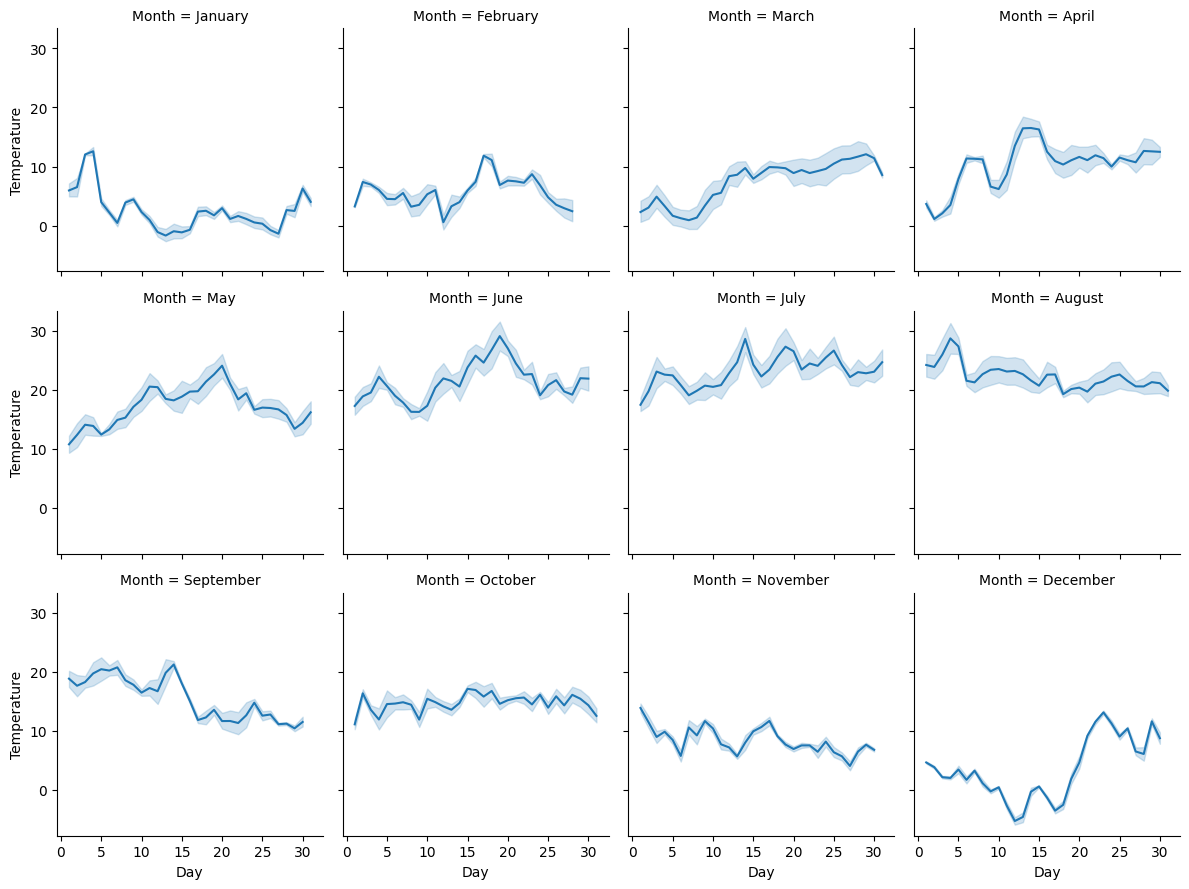

In [84]:
bins_x=np.arange(0,31,5)
g=sns.FacetGrid(data=df,col='Month',col_wrap=4,sharey=True,sharex=True)
g.map(sns.lineplot,'Day','Temperature');
plt.xticks(bins_x);

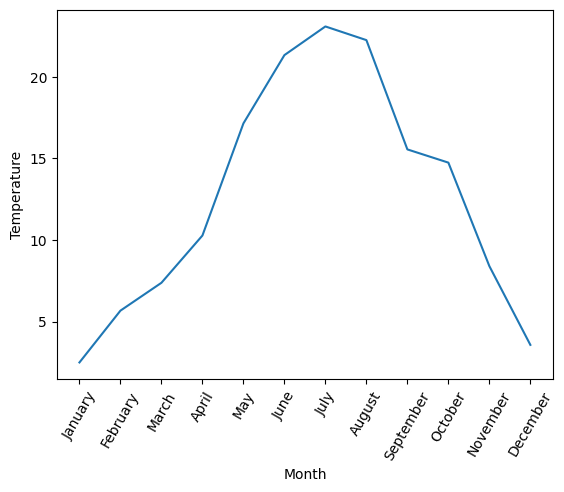

In [92]:
sns.lineplot(data=temp_df,x='Month',y='Temperature',);
plt.xticks(rotation=60);